# Data Visualization
- word cloud
- regression plot
- map (menggunakan folium)
- waffle chart (optional)

## Word Cloud
digunakan untuk membuat visual tentang sekelompok data bentuk text

kita akan gunakan data dari novel Alice in Wonderland https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt untuk dijadikan word cloud

kita akan gunakan package python word_cloud buatan amueller https://github.com/amueller/word_cloud/ untuk membuat word cloud nya

In [1]:
# import package
# install dulu kalau tidak ada
!pip install wordcloud

# import package dan variable stopwords nya
from wordcloud import WordCloud, STOPWORDS

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [3]:
# import data alice_novel.txt
alice_novel = open('alice_novel.txt', 'r').read()

print(len(alice_novel))

145192


In [4]:
# intip 1000 karakter pertama di alice_novel
print(alice_novel[:1000])

ï»¿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pict

In [5]:
# misalkan kita mau rapiin datanya, hapus text yang bukan cerita alice, bisa2 aja
alice_novel = alice_novel[688:]

In [6]:
print(alice_novel[:100])

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on t


In [7]:
# package wordcloud sudah siap, data sudah rapi, kita buat word cloud nya

# 1. bikin word cloud
wc = WordCloud()
wc

# 2. generat dengan text kita
wc.generate(alice_novel)

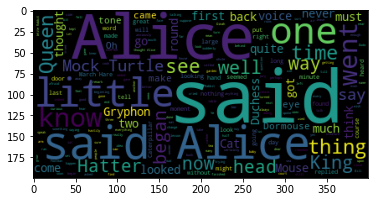

In [8]:
# 3. tampilkan secara visual
plt.imshow(wc)

edit opsi2 wordcloud untuk ubah background, ubah jumlah kata, ubah kata2 yg gk usah di include

edit opsi2 plt nya untuk hapus axis, ganti ukuran gambar, pilih interpolasi tertentu untuk teknik menghaluskan gambar yang berbeda-bead

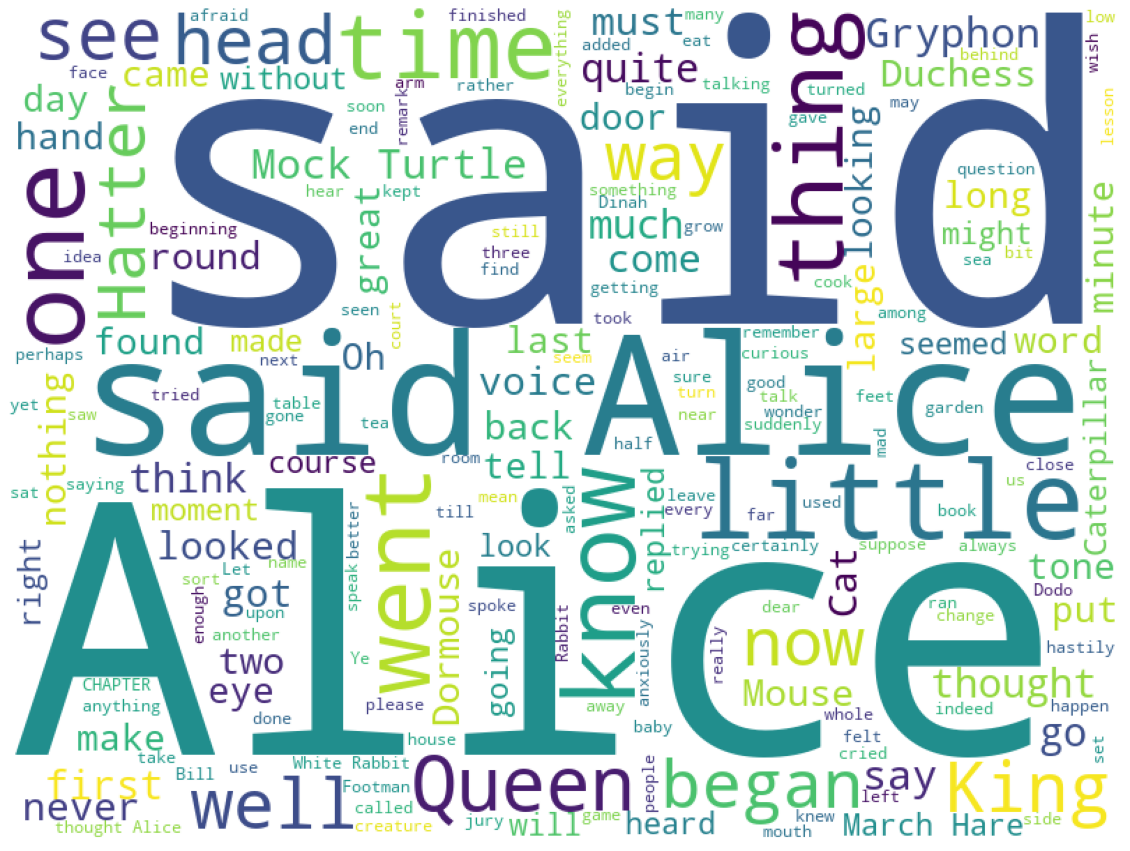

In [9]:
# kita coba lagi, kali ini dengan tambahan opsi2
wc2 = WordCloud(
    background_color='white',
    width=800,
    height=600
)

wc2.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(16)
plt.imshow(wc2)
plt.axis("off")
plt.show()

In [10]:
STOPWORDS.add("said")
sw = STOPWORDS
# kita tambahkan "said" ke STOPWORDS nya karena belum ada

In [11]:
print(sw)

{"they've", "aren't", 'when', 'the', 'whom', 'as', "that's", 'if', "he's", 'other', 'nor', 'this', 'again', 'on', "can't", 'some', "they'll", 'themselves', 'any', "i'll", 'about', 'up', 'during', 'have', 'doing', 'does', 'else', 'once', "he'll", 'am', 'she', 'then', "we'll", 'which', "mustn't", 'in', 'he', 'yourself', 'however', "they're", 'they', 'them', 'than', 'there', "won't", 'her', "you'll", 'your', 'cannot', 'himself', 'was', 'into', "weren't", 'been', "we're", 'both', 'is', 'www', 'their', 'that', 'what', 'here', "hasn't", 'or', 'over', 'ought', 'shall', "didn't", 'to', 'has', 'above', 'of', "there's", "i'm", 'we', 'yours', 'so', "he'd", 'be', 'few', 'while', "where's", 'being', "when's", 'these', "wasn't", 'down', 'myself', "don't", "what's", 'having', 'hence', 'said', 'out', 'ours', 'those', 'yourselves', 'under', 'a', "couldn't", 'com', 'hers', 'very', 'ever', 'would', 'since', 'from', 'had', 'its', "i'd", 'k', 'by', 'all', 'below', 'most', 'off', "they'd", 'i', 'herself', '

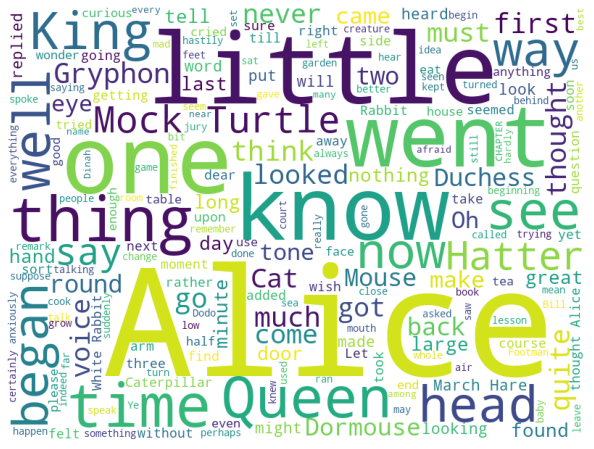

In [12]:
# perhatikan adanya kata2 yang tidak menambah informasi tentang cerita Alice in Wonderland
# seperti said, kita bisa exclude menggunakan stopwords
wc2 = WordCloud(
    background_color='white',
    width=800,
    height=600,
    stopwords=sw
)

wc2.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.imshow(wc2)
plt.axis("off")
plt.show()

In [13]:
# pakai masking untuk membuat wordcloud berbentuk beda
# kita load gambar hitam putih (mask image) untuk bentuk word cloud

# pakai numpy dan Image
alice_image = np.array(Image.open("alice_mask.png"))
alice_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

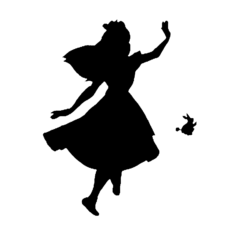

In [14]:
# numpy array nya bisa ditampilkan sebagai gambar dengan menggunakan matplotlib pyplot imshow
plt.imshow(alice_image, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

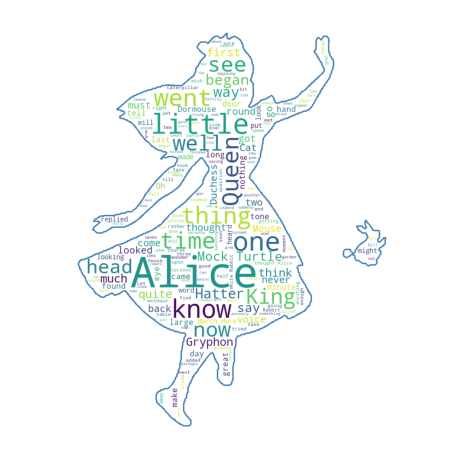

In [15]:
# buat lagi word cloud, kali ini pakai mask
wc3 = WordCloud(
    background_color="white",
    mask=alice_image,
    stopwords=STOPWORDS,
    contour_width=3, # tambahin border
    contour_color='steelblue'
)

wc3.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.imshow(wc3)
plt.axis("off")
plt.show()

membuat Word Cloud dengan data imigrasi Canada, atau data tabular lainnya.

membuat word cloud tidak harus dari data novel saja, kita bisa convert data lain jadi kumpulan text untuk dijadikan word cloud.

In [16]:
# import data imigrasi Canada
df_can = pd.read_excel("https://github.com/stefkwan-h8/dataset/blob/main/Canada.xlsx?raw=true", 
                       sheet_name="Canada by Citizenship",
                       skipfooter=2,
                       skiprows=20)

df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [17]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [18]:
# rapiin data
df_can = df_can.drop(columns=['Type', 'Coverage', 'AREA', 'AreaName','REG', 'RegName', 'DEV','DevName'])
df_can = df_can.rename(columns={"OdName":"Country"})

df_can.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


In [19]:
# bikin kolom total untuk total imigrasi
df_can["Total"] = df_can.sum(axis=1)
df_can.head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_5344\2722375424.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can["Total"] = df_can.sum(axis=1)


,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15


In [20]:
# kita convert total imigran per negara menjadi text nama negaranya, lalu kita buat jadi word cloud
total_semua = df_can["Total"].sum()
total_semua

6409153

In [21]:
df_can_count = df_can[["Country", "Total"]]
df_can_count.head()

,Country,Total
0,Afghanistan,58639
1,Albania,15699
2,Algeria,69439
3,American Samoa,6
4,Andorra,15


In [22]:
# convert per proporsi
size_wc = 10000 # ukuran word cloud kita berapa kata

can_text = ""

for country, count in df_can_count.values:
    b = int(count/total_semua*size_wc)
    # kita punya nama negaranya, total imigran, dan muncul berapa kali di kumpulan text wc kita
    # nama negaranya kita tempelin jadi 1 kata semua tanpa spasi
    # hapus juga simbol2 lainnya seperti ()'
    country = country.replace("(", "_")
    country = country.replace(")", "_")
    country = country.replace("'", "_")
    country = country.replace(" ", "_")

    print(country, count, b)
    
    country = country + " "

    can_text = can_text + " " + country * b

Afghanistan 58639 91
Albania 15699 24
Algeria 69439 108
American_Samoa 6 0
Andorra 15 0
Angola 2113 3
Antigua_and_Barbuda 981 1
Argentina 19596 30
Armenia 3310 5
Australia 23829 37
Austria 4985 7
Azerbaijan 2649 4
Bahamas 808 1
Bahrain 475 0
Bangladesh 65568 102
Barbados 6923 10
Belarus 7975 12
Belgium 10762 16
Belize 1083 1
Benin 2852 4
Bhutan 5876 9
Bolivia__Plurinational_State_of_ 3205 5
Bosnia_and_Herzegovina 21855 34
Botswana 396 0
Brazil 29659 46
Brunei_Darussalam 600 0
Bulgaria 23310 36
Burkina_Faso 2043 3
Burundi 8110 12
Cabo_Verde 201 0
Cambodia 6538 10
Cameroon 16021 24
Canada 20 0
Central_African_Republic 550 0
Chad 1653 2
Chile 21359 33
China 659962 1029
China,_Hong_Kong_Special_Administrative_Region 9327 14
China,_Macao_Special_Administrative_Region 284 0
Colombia 72088 112
Comoros 194 0
Congo 1686 2
Costa_Rica 4489 7
Côte_d_Ivoire 8291 12
Croatia 8001 12
Cuba 20365 31
Cyprus 1126 1
Czech_Republic 4192 6
Democratic_People_s_Republic_of_Korea 388 0
Democratic_Republic_of_th

In [23]:
# can_text

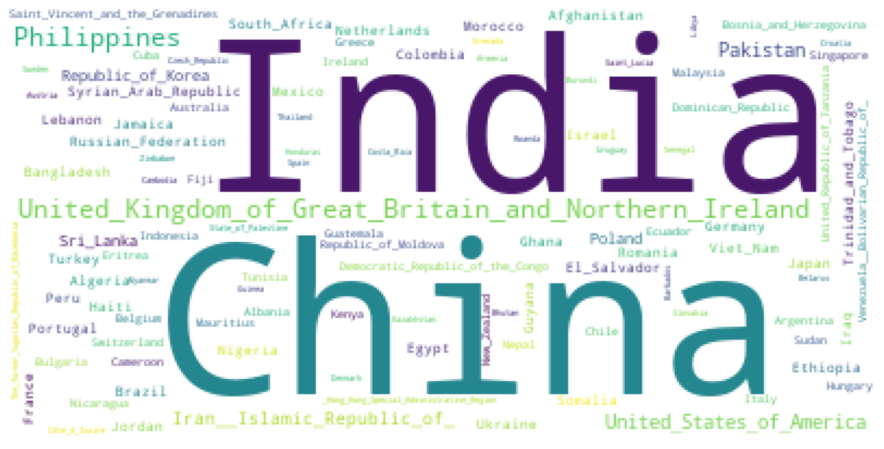

In [24]:
# buat word cloud

wc_can = WordCloud(
    background_color="white",
    collocations=False # untuk menghilangkan kata yang muncul 2x seperti kata-kata, layang-layang,...
)

wc_can.generate(can_text)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(8)

plt.imshow(wc_can)
plt.axis("off")
plt.show()